In [1]:
import random
import h5py
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
two = h5py.File('output_digi_HDF_2Body.h5', 'r')
three = h5py.File('output_digi_HDF_3Body.h5', 'r')

In [3]:
sample_size = 50
len2 = len(list(two.keys()))
len3 = len(list(three.keys()))

In [9]:
file_name = 'AllEvents_size' + str(sample_size) + '.h5'
new = h5py.File(file_name, 'a')
for i in tqdm.tqdm(range(len2)):
    name = 'Event_[' + str(i) + ']'
    event2 = two[name]
    event3 = three[name]
    length2 = len(event2)
    length3 = len(event3)
    event_data2 = np.zeros((length2, 6), float)
    event_data3 = np.zeros((length3, 6), float)
    #converting event into an array
    for i,e in enumerate(event2):
        instant = np.array(list(e))
        event_data2[i] = np.array(instant)
    for i,e in enumerate(event3):
        instant = np.array(list(e))
        event_data3[i] = np.array(instant)
    
    new_event2 = np.zeros((sample_size, 6), float)
    new_event3 = np.zeros((sample_size, 6), float)
    new_name2 = name + '.2'
    new_name3 = name + '.3'
    #making new array for normalized event
    if length2 != sample_size:
        if length2 != 0:
            for i in range(sample_size):
                row = random.randint(0, length2 - 1)
                new_event2[i,:] = event_data2[row,:]
        else:
            pass
    else:
        new_event2 = event_data2
    if length3 != sample_size:
        if length3 != 0:
            for i in range(sample_size):
                row = random.randint(0, length3 - 1)
                new_event3[i,:] = event_data3[row,:]
        else:
            pass
    else:
        new_event3 = event_data3
    new.create_dataset(new_name2, data = new_event2)
    new.create_dataset(new_name3, data = new_event3)

100%|██████████| 10000/10000 [04:23<00:00, 37.90it/s]


In [16]:
print(new['Event_[227].2'].shape)
print(new['Event_[227].3'].shape)

(50, 6)
(50, 6)


In [36]:
#splits all events data into training and validation sets
name = 'AllEvents_size' + str(sample_size)
whole = h5py.File(name + '.h5','r')
train = h5py.File(name + '_train.h5', 'a')
val = h5py.File(name + '_val.h5', 'a')
keys = list(whole.keys())
length = len(keys)
val_len = int(0.2*length)
val_set_indices = np.random.choice(range(length), val_len, replace=False)
for i in tqdm.tqdm(range(length)):
    event = whole[keys[i]]
    if np.isin(i, val_set_indices, assume_unique=True):
        val.create_dataset(keys[i], data = event)
    else:
        train.create_dataset(keys[i], data = event)

100%|██████████| 20000/20000 [00:16<00:00, 1237.80it/s]


In [37]:
print(val_len, len(list(val.keys())))
print(length - val_len, len(list(train.keys())))

4000 4000
16000 16000


In [10]:
#run this if you haven't run the cells above
new = h5py.File('AllEvents_size50.h5','r')

In [63]:
def get_change(set_name, sample_size, event):
    if str(set_name) == 'two':
        if len(two[str(event)]) > sample_size:
            return 'Downsampled'
        elif len(two[str(event)]) < sample_size:
            return 'Upsampled'
        else:
            return ''
    else:
        if len(three[str(event)]) > sample_size:
            return 'Downsampled'
        elif len(three[str(event)]) < sample_size:
            return 'Upsampled'
        else:
            return ''

36 vs. 50 points


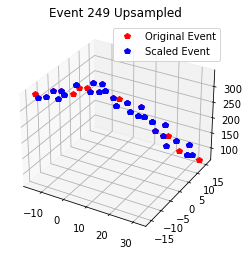

In [68]:
event = 249
name = 'Event_[' + str(event) + ']'
new_name = name + '.2'
print(str(len(two[name])) + ' vs. ' + str(sample_size) + ' points')

ax = plt.axes(projection='3d')
#plotting original event
event = two[name]
evt_data = np.zeros((len(event[:]),6))
for i,e in enumerate(event):
    instant = np.array(list(e))
    evt_data[i] = np.array(instant)
x = evt_data[:,0]
y = evt_data[:,1]
z = evt_data[:,2]
ax.plot3D(x,y,z,"rp", label='Original Event')

#plotting normalized event
event = new2[name]
evt_data = np.zeros((sample_size,6))
for i,e in enumerate(event):
    instant = np.array(list(e))
    evt_data[i] = np.array(instant)
x = evt_data[:,0]
y = evt_data[:,1]
z = evt_data[:,2]
ax.plot3D(x,y,z,"bp", label='Scaled Event')
plt.title(name[:5] + ' ' + name[7:-1] + ' ' + get_change('two', sample_size, name))
ax.legend()
plt.show() 